In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
training_data = pd.read_csv('../datasets/FB_training_data.csv')

In [30]:
training_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-02,78.580002,78.930000,77.699997,78.449997,78.449997,18177500
1,2015-01-05,77.980003,79.250000,76.860001,77.190002,77.190002,26452200
2,2015-01-06,77.230003,77.589996,75.360001,76.150002,76.150002,27399300
3,2015-01-07,76.760002,77.360001,75.820000,76.150002,76.150002,22045300
4,2015-01-08,76.739998,78.230003,76.080002,78.180000,78.180000,23961000


In [31]:
len(training_data)

1258

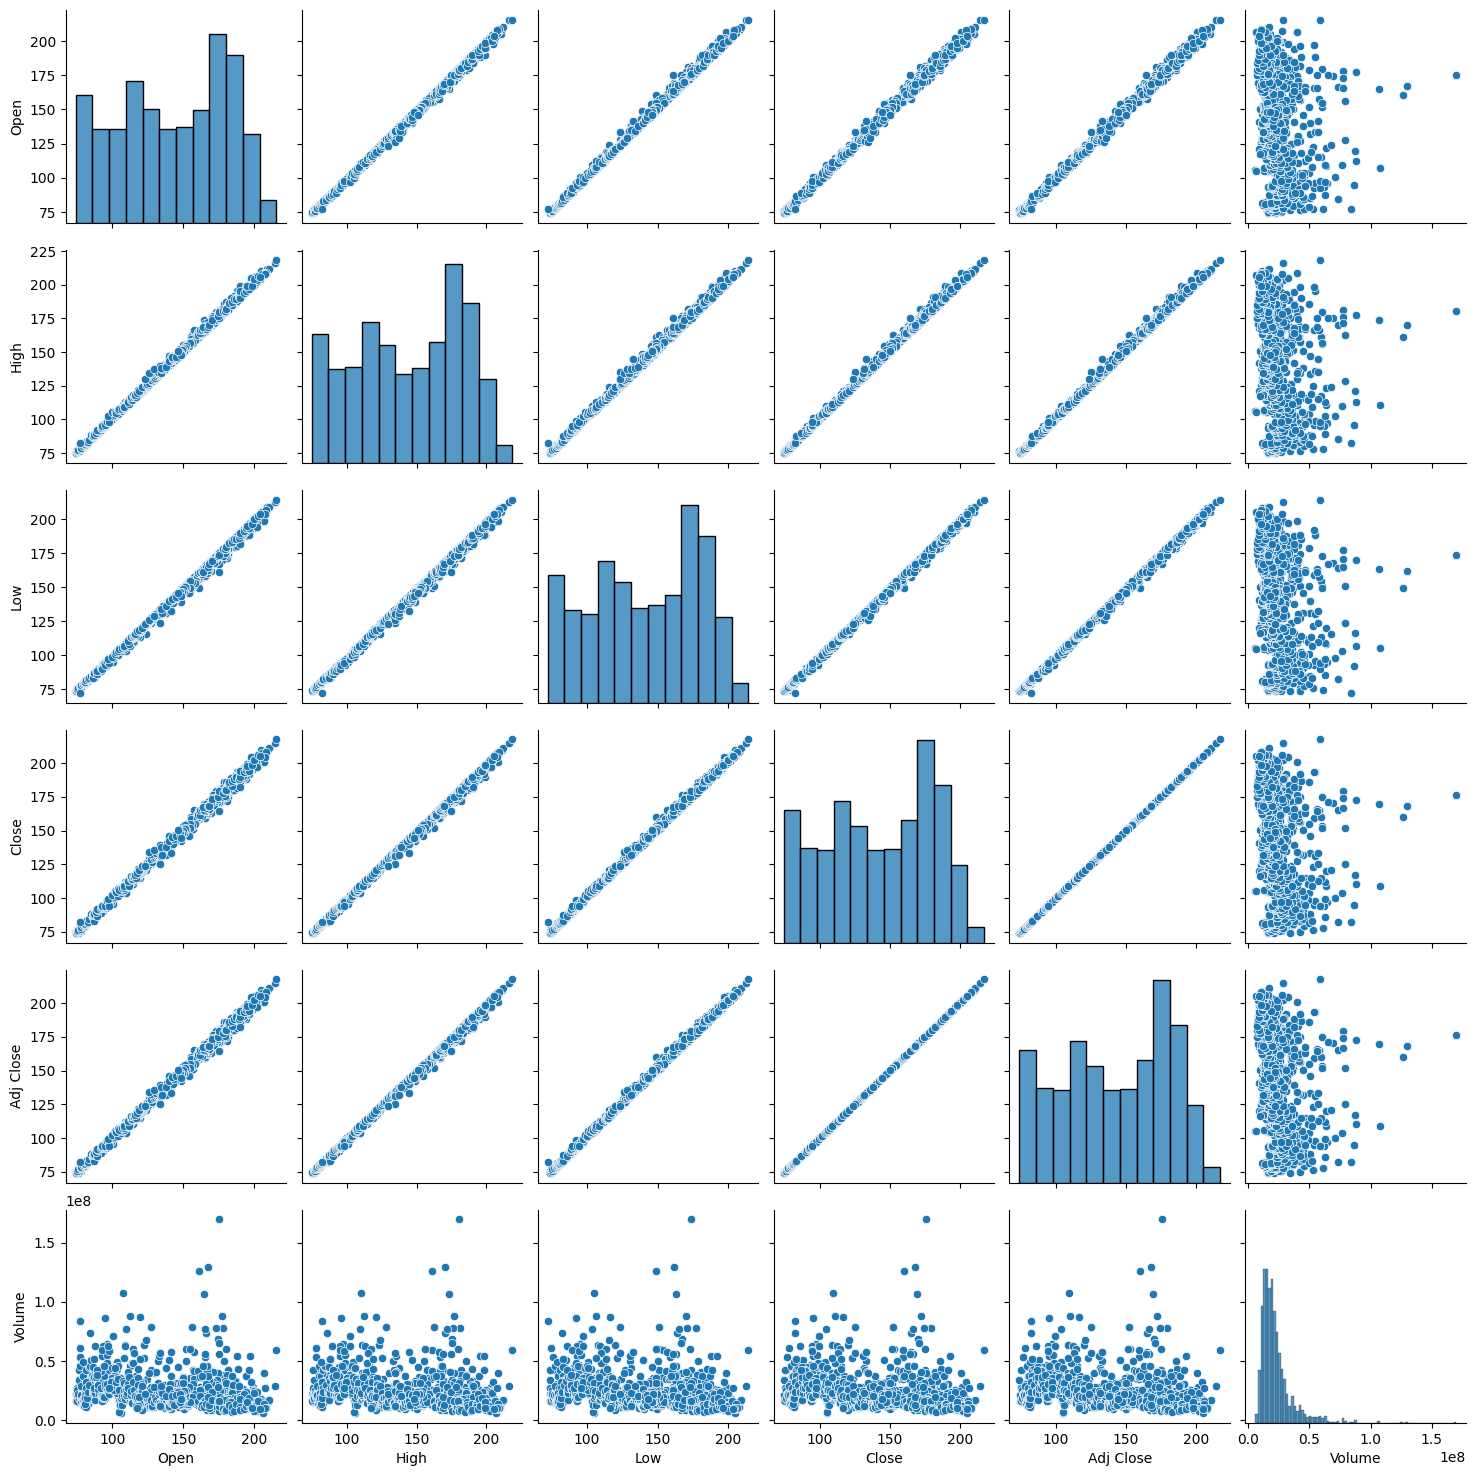

In [32]:
sns.pairplot(training_data)

In [33]:
training_data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1253,2019-12-24,206.300003,206.789993,205.000000,205.119995,205.119995,6046300
1254,2019-12-26,205.570007,207.820007,205.309998,207.789993,207.789993,9350700
1255,2019-12-27,208.669998,208.929993,206.589996,208.100006,208.100006,10284200
1256,2019-12-30,207.860001,207.899994,203.899994,204.410004,204.410004,10524300
1257,2019-12-31,204.000000,205.559998,203.600006,205.250000,205.250000,8953500


In [34]:
training_data.shape

(1258, 7)

In [35]:
training_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,143.036971,144.452154,141.552568,143.073386,143.073386,2.261876e+07
std,38.065057,38.399162,37.734180,38.086761,38.086761,1.400415e+07
min,74.040001,74.830002,72.000000,74.050003,74.050003,5.913100e+06
25%,111.695004,112.772499,110.339999,112.187500,112.187500,1.435028e+07
50%,146.114998,147.930001,144.205002,145.650002,145.650002,1.900420e+07
75%,177.824997,179.145004,175.822502,177.562500,177.562500,2.560708e+07
max,215.720001,218.619995,214.270004,217.500000,217.500000,1.698037e+08


In [36]:
# Close
training_data_df = pd.DataFrame(training_data)

In [37]:
training_data = training_data_df.iloc[:, 4].values

In [38]:
type(training_data)

numpy.ndarray

In [39]:
training_data.shape

(1258,)

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [41]:
training_data = scaler.fit_transform(training_data.reshape(-1, 1))

In [42]:
training_data.shape

(1258, 1)

In [43]:
x_training_data = []
y_training_data = []

In [44]:
for i in range(40, len(training_data)):
    x_training_data.append(training_data[i-40:i, 0]) # IV 
    y_training_data.append(training_data[i, 0]) # DV

In [45]:
x_training_data[0]

array([0.03067267, 0.02188915, 0.01463924, 0.01463924, 0.0287905 ,
       0.02572321, 0.01861274, 0.01673053, 0.01554546, 0.        ,
       0.00787729, 0.01526661, 0.01875214, 0.02509585, 0.02635064,
       0.02405017, 0.01205992, 0.01526661, 0.02753571, 0.0129662 ,
       0.00655277, 0.00941094, 0.01101425, 0.01087486, 0.00292784,
       0.00271871, 0.00794701, 0.01714883, 0.01519693, 0.01178107,
       0.01080512, 0.01854302, 0.03743461, 0.04078075, 0.03339138,
       0.03067267, 0.03841056, 0.04433601, 0.03429765, 0.03973508])

In [46]:
y_training_data[0]

np.float64(0.0386894047826295)

In [47]:
x_training_data = np.array(x_training_data)
y_training_data = np.array(y_training_data)

In [48]:
y_training_data.shape

(1218,)

In [49]:
x_training_data = np.reshape(x_training_data, (x_training_data.shape[0], x_training_data.shape[1], 1))

In [50]:
x_training_data.shape

(1218, 40, 1)

In [51]:
# %pip install tensorflow

In [52]:
import tensorflow as tf

In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [54]:
rnn = Sequential()

In [55]:
rnn.add(
  LSTM(
    units = 45,
    return_sequences = True,
    input_shape = (x_training_data.shape[1], 1)
  )
)

/Users/park/Library/Python/3.9/lib/python/site-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [56]:
rnn.add(Dropout(0.2))

In [57]:
rnn.add(
  LSTM(
    units = 45,
    return_sequences = True
  )
)
rnn.add(Dropout(0.2))

rnn.add(
  LSTM(
    units = 45,
    return_sequences = True
  )
)
rnn.add(Dropout(0.2))

# Last LSTM layer
rnn.add(
  LSTM(
    units = 45
  )
)
rnn.add(Dropout(0.2))

In [58]:
# Output layer: 1
# LSTM, Don't need to specify active function
rnn.add(Dense(units = 1))

In [59]:
rnn.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
rnn.fit(
  x_training_data,
  y_training_data,
  epochs = 100, # 50 - 100
  batch_size = 32 # 39 batches
)

Epoch 1/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1121
Epoch 2/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0080
Epoch 3/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0062
Epoch 4/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0070
Epoch 5/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0052
Epoch 6/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0059
Epoch 7/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0057
Epoch 8/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0046
Epoch 9/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0052
Epoch 10/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0050
Epoch 11/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0045
Epoch 12/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0064
Epoch 13/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0053
Epoch 14/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.0048
Epoch 15/100
39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - lo

In [61]:
test_data = pd.read_csv('../datasets/FB_test_data.csv')

In [62]:
test_data = test_data.iloc[:, 4].values

In [63]:
test_data.shape

(21,)

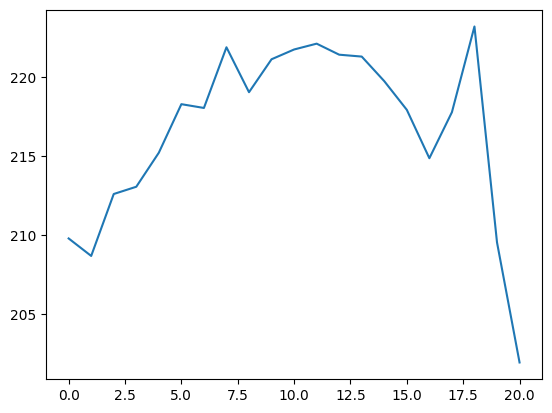

In [64]:
plt.plot(test_data)

In [66]:
unscaled_training_data = pd.read_csv("../datasets/FB_training_data.csv")
unscaled_test_data = pd.read_csv("../datasets/FB_test_data.csv")

In [68]:
all_data = pd.concat(
  (unscaled_training_data['Close'], unscaled_test_data['Close']),
  axis = 0
)

In [71]:
x_test_data = all_data[
  len(all_data) - len(test_data) - 40: # 40 previous days
].values

In [72]:
x_test_data.shape

(61,)

In [73]:
len(x_test_data)

61

In [74]:
x_test_data = np.reshape(x_test_data, (-1, 1))

In [75]:
x_test_data = scaler.transform(x_test_data)

In [76]:
final_x_test_data = []

for i in range(40, len(x_test_data)):
    final_x_test_data.append(x_test_data[i-40:i, 0])

final_x_test_data = np.array(final_x_test_data)

In [78]:
final_x_test_data.shape

(21, 40)

In [79]:
final_x_test_data = np.reshape(
  final_x_test_data, 
  (
    final_x_test_data.shape[0], 
    final_x_test_data.shape[1], 
    1
  )
)

In [80]:
final_x_test_data.shape

(21, 40, 1)

In [81]:
predictions = rnn.predict(final_x_test_data)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


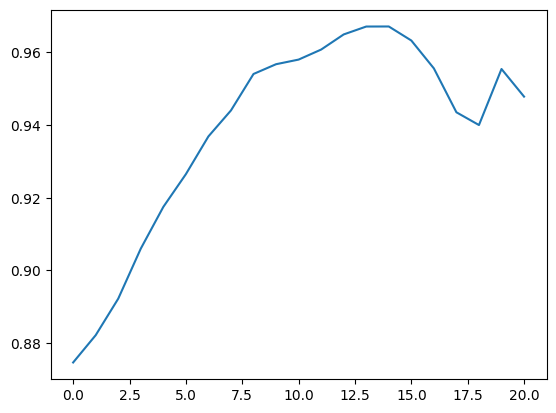

In [82]:
plt.plot(predictions)

In [83]:
unscaled_predictions = scaler.inverse_transform(predictions)

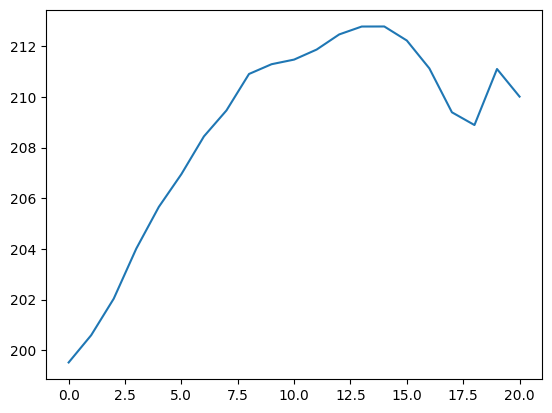

In [84]:
plt.plot(unscaled_predictions)

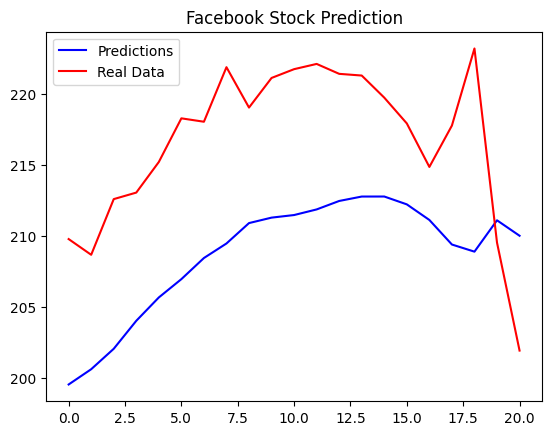

In [85]:
plt.plot(unscaled_predictions, color="blue", label="Predictions")
plt.plot(test_data, color="red", label="Real Data")
plt.title("Facebook Stock Prediction")
plt.legend()